# Test
## Introduction
Il existe de nombreux formats pour stocker les fichiers audio. Le format [wav](https://fr.wikipedia.org/wiki/WAVEform_audio_format) est en fait un conteneur qui comprend une en-tête de description suivie du signal audio lui-même. De nombreux formats de données sont possibles et le plus courant est un format sans perte (non compressé) tel que le format en entier 16 bits, [PCM](https://fr.wikipedia.org/wiki/Modulation_d%27impulsion_codée). L'objectif de ce notebook est d'être capable de lire un fichier .wav sous python et d'afficher la forme d'onde en fonction du temps. 

#### mots clefs : 
sounddevice, soundfile, échantillonnage

## Packages python
Nous allons utiliser les packages python 
* [IPython](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html) : pour jouer les signaux audio (numpy arrays) et enregistrer 
* [soundfile](https://pypi.python.org/pypi/SoundFile/0.8.1) : pour lire/écrire des fichiers .wav

## Read and play
Après installation de ces packages, vous êtes en mesure de lire un premier signal audio et de le jouer, c'est-à-dire l'envoyer vers le convertisseur numérique analogique (CNA) qui équipe la carte son de l'ordinateur. 

In [1]:
import IPython.display as ipd
import soundfile as sf

#lecture du fichier piano.wav
#le fichier doit se trouver dans le même répertoire que le notebook
x, Fe = sf.read('piano.wav')
print('Fe =', Fe, 'Hz')
ipd.Audio(data=x, rate=Fe) # N.B. : ipd.Audio('piano.wav') fonctionne également

Fe = 44100 Hz


## Signal
Le signal est enregistré dans l'ordinateur sous la forme d'une séquence finie de nombres, ici dans un `array` numpy `x`. Mathématiquement, ces signaux finis sont souvent notés sous forme de vecteurs de complexes, soit
$$ \mathbf{x}=[x(0) \, x(1) \, \ldots \, x(N-1)]^T $$
où $ N $ est le nombre *d'échantillons*. Ce signal est un vecteur de $\mathbb{C}^N$. 

## Affichage avec matplotlib
Nous utiliserons le package d'affichage graphique `matplotlib`. Ses possibilités sont très grandes (légendes, subplot, titres, axes, animations, etc..) mais pour l'instant voici un exemple simple :

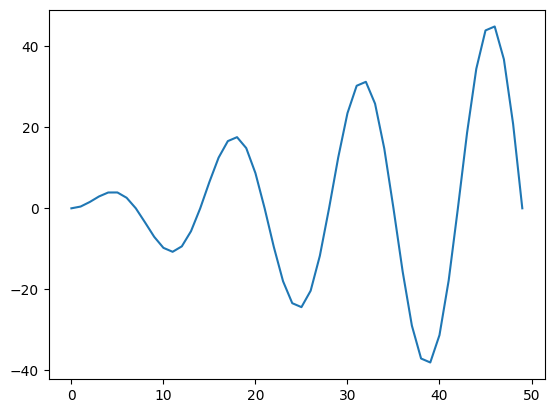

In [42]:
import numpy as np
import matplotlib.pyplot as plt
pi = np.pi # la variable pi est prédéfinie dans numpy

t = np.arange(50)
x = t*np.sin(pi*t/7)

plt.plot(t,x)
plt.show()

Un tutoriel se trouve [ici](https://matplotlib.org/stable/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py). 
## Affichage de la forme d'onde
Le graphe des valeurs d'un signal 1D en fonction du temps s'appelle sa forme d'onde. Ici le signal considéré est échantillonné de manière régulière, ce qui signifie que ses valeurs sont prélevées tout les $T_e=F_e^{-1}$ secondes dans un signal à temps continu (analogique) $x_a(t)$. Soit $$x(n)=x_a(nT_e)$$
C'est à vous de jouer dans la prochaine cellule de code : lire le fichier `piano.wav` et afficher la forme d'onde en fonction du temps. Renvoyer la valeur de la durée totale du fichier.

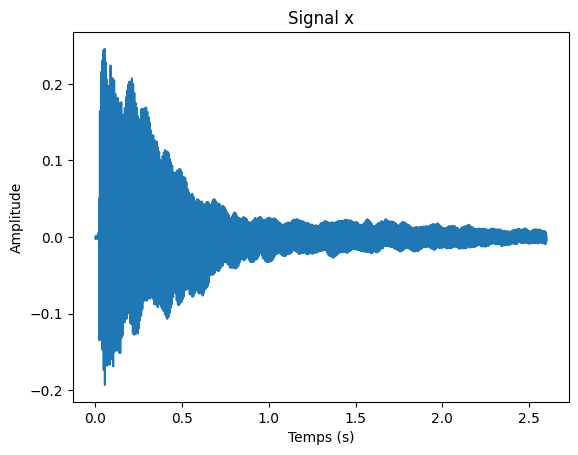

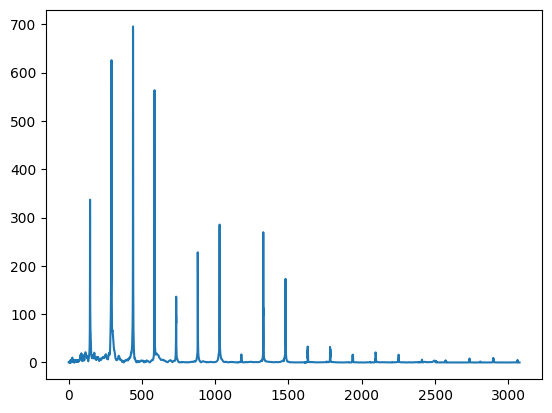

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

x, Fe = sf.read('piano.wav')
t = np.arange(len(x))/Fe

plt.plot(t,x)
plt.title('Signal x')
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.show()

# Define the downsampling factor
downsampling_factor = 100

'''
# Downsample the signal
downsampled_x = x[::downsampling_factor]
downsampled_t = t[::downsampling_factor]

# Plot the downsampled signal
plt.plot(downsampled_t, downsampled_x)
plt.title('Downsampled Signal x')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()
'''

f = np.fft.fftfreq(len(x), 1/Fe)
X = np.fft.fft(x)

plt.plot(f[:8000], np.abs(X[:8000]))


## Mélodie aléatoire 

1. Créer un vecteur x sinusoïdal à la fréquence de $f_0 = 440$ Hz (La du diapason) pour un échantillonnage de 8000 échantillons par secondes. Sa longueur sera d’une 0.5 seconde. Jouer le son obtenu par
`ipd.audio(data=x,rate=Fe)`. On	pourra	améliorer	le	rendu	en	multipliant	le	vecteur	par	une	fenêtre	de	Hann (fonction `numpy.hanning`)
2. Tirer une variable aléatoire gaussienne `y` d’écart-type 3 à
l’aide de la fonction `np.random.randn`. Soit `r`, l’arrondi de `y` à l’entier le plus proche
(fonction `np.round`).
3. Pour monter d'un demi-ton (passer de la à la#) il suffit de multiplier $f_0$ par
$\alpha = 12\sqrt{2}$. A l’aide d’une boucle `for` et de la concaténation (`np.concatenate`) créer une mélodie aléatoire de notes d’une 0.5 secondes dont l’intervalle (écart en demi-tons) avec la note précédente est `r`.
4. Améliorations possibles : tirer une valeur rythmique aléatoire (fonction `np.random.randint`) entre 1 et 4 où 1 correspond à la blanche (durée 1s) et 4 à la
double-croche (1/24 s) et/ou introduire de la distorsion (avant fenêtrage)
sous la forme $x \leftarrow x - 0.5 x^3 +	0.3x^5$.

In [35]:
f0 = 440  #frequence en HZ
duration = 0.5  #durée = 0.5 secondes
sampling_rate = 8000  #fréquence d'échantillonnage = 8000 Hz

t = np.linspace(0, duration, int(duration * sampling_rate)) 
x = np.sin(2 * np.pi * f0 * t) * np.hanning(len(t)) 

print(x)
ipd.Audio(data=x, rate=sampling_rate)

[ 0.00000000e+00  2.09105229e-07  1.57389476e-06 ... -1.57389476e-06
 -2.09105229e-07  0.00000000e+00]


In [27]:
y = np.random.randn()*3
r = int(np.round(y))

In [41]:
alpha = 12*np.sqrt(2)
melodie = []
melodie = np.concatenate((melodie,x))
new_f0 = f0

for i in range(5):
    new_f0 = new_f0*alpha*r
    x = np.sin(2 * np.pi * new_f0 * t) * np.hanning(len(t))
    melodie = np.concatenate((melodie,x))

ipd.Audio(data=melodie, rate=sampling_rate)